## Guassian Samples

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Let's start with two independent uniform random variables
$U_1, U_2$ ~ $Unif(0, 1)$

### via Inverse Transform Technique (ITT)

#### Convert them into polar coordinates:

- Radius:
  $\begin{align}
  R = F_1^{-1}(U_1)
  \end{align}$
  where $F_1$ is the CDF of the **Rayleigh distribution**:
  
  $F_1(r) = 1 - e^{-r^2/2}
  \Rightarrow 
  F_1^{-1}(u) = \sqrt{-2 \ln(1 - u)} \approx \sqrt{-2 \ln u}$

- Angle:  
  $
  \Theta = 2\pi U_2
  $

#### Convert from polar to Cartesian coordinates:

$
Y_1 = R \cos(\Theta), \quad Y_2 = R \sin(\Theta)
$

Then $Y_1, Y_2 \sim \mathcal{N}(0, 1)$ (i.i.d. standard normal variables).


Simply discard one of them, $Y_2$, and use:

$
X = \sigma Y_1 + \mu
$



In [5]:
def generate_normal_samples(n, μ=0, σ=1):

    U1 = np.random.uniform(0, 1, n)
    U2 = np.random.uniform(0, 1, n)

    R = np.sqrt(-2 * np.log(U1))
    theta = 2 * np.pi * U2


    Y1 = R * np.cos(theta)
    # Y2 = R * np.sin(theta) discard

    return σ * Y1 + μ
    

In [6]:
samples = generate_normal_samples(10000)

In [19]:
np_samples = np.random.normal(0, 1, 10000)

In [21]:
x = np.linspace(-4, 4, 1000)

# guassian_distribution
pdf = (1/(np.sqrt(2*np.pi))) * np.exp(-x**2/2)


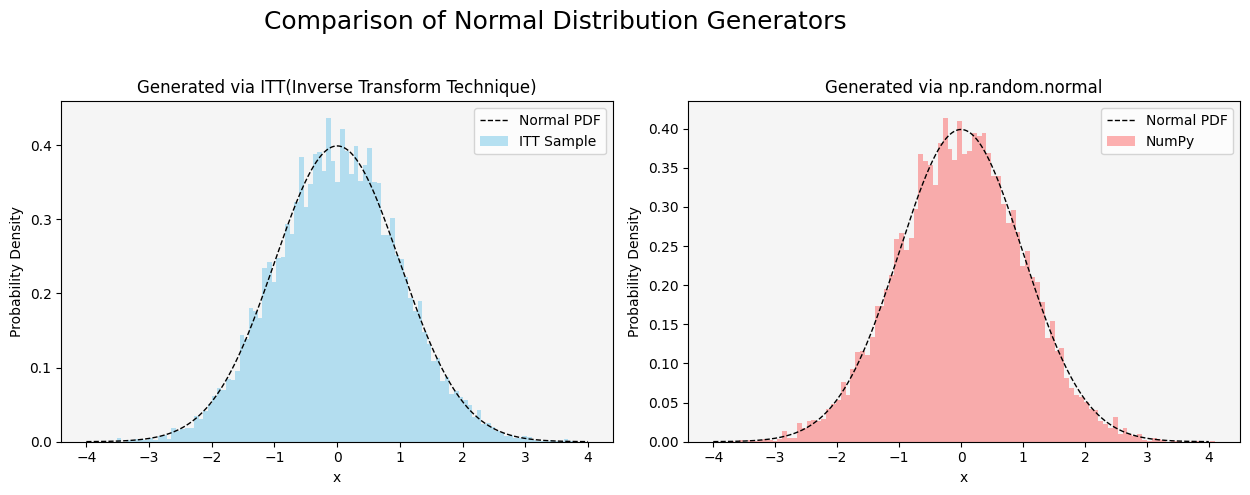

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Comparison of Normal Distribution Generators", fontsize=18)

ax1.plot(x, pdf, 'k--', linewidth=1, label="Normal PDF")
ax1.hist(samples, bins=100, density=True, alpha=0.6, label="ITT Sample", color="skyblue")
ax1.set_title("Generated via ITT(Inverse Transform Technique)")
ax1.set_xlabel("x")
ax1.set_ylabel("Probability Density")
ax1.legend()
ax1.set_facecolor("whitesmoke")

# k-- means black lines
ax2.plot(x, pdf, 'k--', linewidth=1, label="Normal PDF")
ax2.hist(np_samples, bins=100, density=True, alpha=0.3, label="NumPy", color="red", histtype='stepfilled')
ax2.set_title("Generated via np.random.normal")
ax2.set_xlabel("x")
ax2.set_ylabel("Probability Density")
ax2.legend()
ax2.set_facecolor("whitesmoke")

plt.tight_layout(rect=[0.1, 0, 1, 0.95])
plt.show()

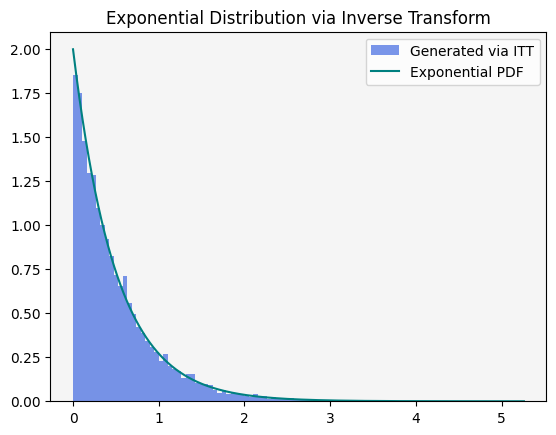

In [62]:
# Inverse transform for Exponential(λ=2)
U = np.random.uniform(0, 1, 10000)
X = -1/2 * np.log(1 - U)  # or just -np.log(U)/2

x_vals = np.linspace(0, max(X), 1000)

# Exponential λe^-λx or 0 otherwise
pdf = 2 * np.exp(-2 * x_vals)

plt.hist(X, bins=100, density=True, alpha=0.7,color="royalblue", label="Generated via ITT")
plt.plot(x_vals, pdf, 'teal', label="Exponential PDF")
plt.title("Exponential Distribution via Inverse Transform")
plt.gca().set_facecolor("whitesmoke")
plt.legend()
plt.show()